# The Basics of Pytorch
---

## 1. Tensors:
Tensors are the foundation of PyTorch and serve as the building blocks for all operations. They are similar to NumPy arrays except Tensors also work on sophisticated hardware like GPUs and TPUs, which significantly boost processing speed.

Tensors can have different dimensionalities (this is also called rank in the research litreature):

- Scalar Tensor: A single value.
- Vector Tensor: A 1D array of values.
- Matrix Tensor: A 2D array of values.
- Higher-Dimensional Tensor: Arrays with more than two dimensions.

In [13]:
!pip install onnx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 67.8 MB/s eta 0:00:00


In [ ]:
import torch

### Creating Tensors

In [ ]:
# Creating Tensors on CPU and GPU
cpu_tensor = torch.tensor([1, 2, 3])
gpu_tensor = torch.tensor([1, 2, 3], device = "cuda")

# Creating Random Tensors
random_tensor = torch.rand(3, 3)  # 3x3 random tensor between 0 and 1
randn_tensor = torch.randn(3, 3)  # 3x3 random tensor from normal distribution

print(cpu_tensor)
print(gpu_tensor)
print(random_tensor)
print(randn_tensor)

tensor([1, 2, 3])
tensor([1, 2, 3], device='cuda:0')
tensor([[0.3023, 0.1553, 0.1202],
        [0.2431, 0.4662, 0.6872],
        [0.4119, 0.8847, 0.2745]])
tensor([[ 2.0847,  0.9870,  0.4378],
        [-0.4401,  1.1539, -0.0938],
        [ 1.4475,  0.0574,  1.2382]])


Torch Tensors work just like numpy arrays and a lot of the syntax is just like numpy for example we can use the (+, -, *, /...) operators in pytorch just like numpy arrays

A lot of the trig and exponential functions work just like numpy as well

In [ ]:
tensor_a = torch.tensor([1, 2, 3])
tensor_b = torch.tensor([4, 5, 6])

# Element-wise addition
result_add = tensor_a + tensor_b
sin_a = torch.sin(tensor_a) # Can also use cos, tan, tanh...

print(result_add)
print(sin_a)

tensor([5, 7, 9])
tensor([0.8415, 0.9093, 0.1411])


In [ ]:
cpu_tensor + gpu_tensor

RuntimeError: ignored

### We can also do Linear Algebra just like `np.linalg`

In [29]:
import torch

# Create square matrix
matrix = torch.tensor([[1, 2],
                       [2, 5],], dtype=torch.float32)

# Calculate the determinant of the matrix
determinant = torch.linalg.det(matrix)
print("Determinant:", determinant.item())
print()

# Calculate the inverse of the matrix
inverse_matrix = torch.linalg.inv(matrix)
print("Inverse Matrix:")
print(inverse_matrix)
print()

# Solve a linear system of equations
vector = torch.tensor([10, 8], dtype=torch.float32)
solution = torch.linalg.solve(matrix, vector)
print("Solution to Ax = b:", solution)
print()

# Eigenvalues and eigenvectors
eigenvalues, eigenvectors = torch.linalg.eig(matrix)
print("Eigenvalues:", eigenvalues)
print("Eigenvectors:")
print(eigenvectors)


Determinant: 1.0

Inverse Matrix:
tensor([[ 5., -2.],
        [-2.,  1.]])

Solution to Ax = b: tensor([ 34., -12.])

Eigenvalues: tensor([0.1716+0.j, 5.8284+0.j])
Eigenvectors:
tensor([[-0.9239+0.j, -0.3827+0.j],
        [ 0.3827+0.j, -0.9239+0.j]])


## 2. Creating Models with nn.Module:

`nn.Module` is a powerful tool for constructing neural network models. It allows you to define and manage layers, activation functions, and custom functions conveniently. `nn` provides access to many of the layers we might use such as:

- Convolution Layers
- Recurrent Layers
- Transformer Layers for advance NLP applications

in PyTorch define our neural network by subclassing `nn.Module`, and initialize the neural network layers in `__init__`. Every `nn.Module` must implement the operations on input data in the forward method. the backward method is done by torch

In [ ]:
import torch
import torch.nn as nn

class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        out = self.linear_relu_stack(x)
        return out

In [8]:
net = NeuralNetwork()
print(net)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


## 3. Saving Models:
Saving models after training is crucial for reuse and sharing. PyTorch lets you save model parameters, which include learned weights and biases. when it comes to saving the model there are 2 main APIs or backends that PyTorch provides

- Torch saved models
- ONNX Backend

The cool thing about onnx is it's open source and you can load it anywhere literally:
- C++ to run a torch model on an Arduino borad
- JavaScript to run a torch model in the web
- Even Java if you wanted to make a mobile app

In [14]:
# Torch backend
torch.save(net.state_dict(), "Model.pt") # this is like pickel

# ONNX Backend
torch.onnx.export(net, torch.ones(1,28,28), "model.onnx",input_names=["X"], output_names=["y"])

============= Diagnostic Run torch.onnx.export version 2.0.1+cu118 =============
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================



# Torch and the existing python ecosystem


<Axes: ylabel='Count'>

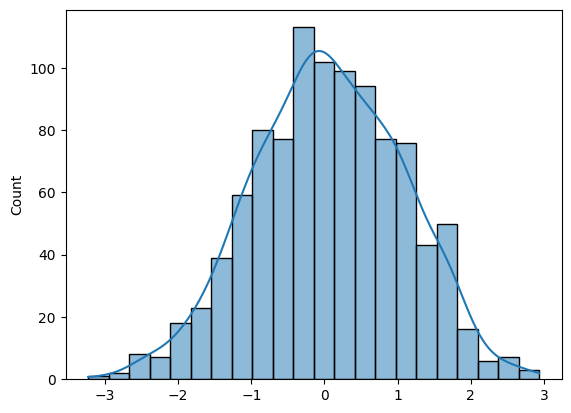

In [22]:
import torch
import numpy as np
import pandas as pd
import seaborn as sns

# Convert PyTorch tensor to NumPy array
pytorch_tensor = torch.tensor([1, 2, 3])
numpy_array = pytorch_tensor.numpy()

# Convert NumPy array to PyTorch tensor
numpy_array = np.array([4, 5, 6])
pytorch_tensor = torch.from_numpy(numpy_array)

# Create a Pandas DataFrame from a PyTorch tensor
data = {'Age': torch.randint(18, 30, (5,)),
        "Name": ["Alice", "Mark", "John", "Priya", "Tom"]} # Tensors cannot be strings
df = pd.DataFrame(data)

# Using Seaborn for visualization
data = torch.randn(1000)
sns.histplot(data, kde=True)


In [23]:
df

,Age,Name
0,19,Alice
1,29,Mark
2,20,John
3,21,Priya
4,25,Tom
